以下のHPから引用。

- AI Academy 手書き数字認識
    - https://aiacademy.jp/texts/show/?id=137

In [1]:
import keras 
import tensorflow as tf

print(keras.__version__)
print(tf.__version__)

2.8.0
2.8.0


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


2022-05-07 17:43:51.801104: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Epoch 1/12
469/469 [==============================] - 96s 203ms/step - loss: 2.2897 - accuracy: 0.1248 - val_loss: 2.2529 - val_accuracy: 0.1998
Epoch 2/12
469/469 [==============================] - 97s 208ms/step - loss: 2.2329 - accuracy: 0.2151 - val_loss: 2.1847 - val_accuracy: 0.3502
Epoch 3/12
469/469 [==============================] - 97s 207ms/step - loss: 2.1629 - accuracy: 0.3083 - val_loss: 2.0947 - val_accuracy: 0.5273
Epoch 4/12
469/469 [==============================] - 96s 205ms/step - loss: 2.0704 - accuracy: 0.3934 - val_loss: 1.9761 - val_accuracy: 0.6545
Epoch 5/12
469/469 [==============================] - 96s 204ms/step - loss: 1.9513 - accuracy: 0.4688 - val_loss: 1.8248 - val_accuracy: 0.7159
Epoch 6/12
469/469 [==============================] - 95s 203ms/step - loss: 1.8072 - accuracy: 0.5263 - val_loss: 1.6442 - val_accuracy: 0.7615
Epoch 7/12
469/469 [==============================] - 95s 203ms/step - loss: 1.6490 - accuracy: 0.5673 - val_loss: 1.4504 - val_ac

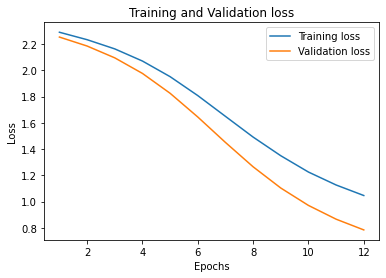

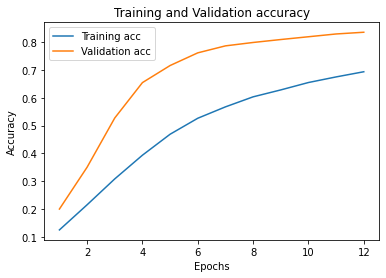

In [2]:
# 参考プログラム
# https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt
import tensorflow as tf 

"""
mnist: 手書き数字画像データセット
Sequential: Kerasを用いてモデルを生成するためのモジュール
Dense: 全結合層のレイヤモジュール
Dropout: ドロップアウトモジュール
Conv2D: 2次元畳み込み層のモジュール
MaxPool2D: 2次元最大プーリング層のモジュール
Flatten: 入力を平滑化するモジュール
"""

batch_size = 128
num_classes = 10
epochs = 12

# 入力画像の大きさ(行と列）
img_rows, img_cols = 28, 28

# 学習データとテストデータに分割したデータ
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# backendがTensorFlowとTheanoで配列のshapeが異なるために2パターン記述
if K.image_data_format() == 'channels_first':
    # 1次元配列に変換
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    # 1次元配列に変換
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

# 入力データの各画素値を0-1の範囲で正規化(学習コストを下げるため)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# ラベルをバイナリベクトルとして扱う
# Kerasはラベルを数値ではなく、0or1を要素に持つベクトルで扱うため

"""
例えば、サンプルに対するターゲットが「5」の場合次のような形になります。
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
"""
from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

# y_train = keras.utils.to_categorical(y_train, num_classes)
# y_test = keras.utils.to_categorical(y_test, num_classes)

# CNNネットワークの構築
# 畳み込みフィルターのサイズ(kernel_size)は3×3。整数か単一の整数からなるタプル/リストで指定
# https://keras.io/ja/layers/convolutional/
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# 損失関数,最適化関数,評価指標を指定してモデルをコンパイル
model.compile(loss=keras.losses.categorical_crossentropy,
              # optimizer=keras.optimizers.Adadelta(),
              optimizer=tf.optimizers.Adadelta(),
              metrics=['accuracy'])

# モデルの学習
hist = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

#モデルの評価
score=model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('test acc:', score[1])

#学習のグラフ化
epochs = range(1, len(hist.history['accuracy']) + 1)

plt.plot(epochs, hist.history['loss'], label='Training loss', ls='-') #損失値
plt.plot(epochs, hist.history['val_loss'], label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, hist.history['accuracy'],  label='Training acc') #正解率
plt.plot(epochs, hist.history['val_accuracy'], label="Validation acc")
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()